In [36]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [37]:
data_path = '..\data\interim\dataset_2017_2018[Preprocess].csv'
df_data = pd.read_csv(data_path)
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')
df_data.sample(5)

,Temperatura,Umidade
ts,,
2018-01-17 02:00:00,22.814167,74.820000
2018-07-21 12:00:00,25.623750,41.025000
2018-12-10 06:00:00,19.250000,80.733333
2017-01-13 04:00:00,20.052857,76.837857
2017-11-01 12:00:00,24.234286,44.134286


In [38]:
def get_humidex(T,H):
    z = 6.112*(10**((7.5*T)/(237.7+T)))*(H/100)
    return T+((5/9)*(z-10))

df_data['Humidex'] = get_humidex(df_data['Temperatura'].values,df_data['Umidade'].values)
df_data

,Temperatura,Umidade,Humidex
ts,,,
2017-01-01 00:00:00,19.509286,85.564286,24.720297
2017-01-01 01:00:00,19.685000,84.550000,24.884933
2017-01-01 02:00:00,19.283333,87.566667,24.592768
2017-01-01 03:00:00,19.080714,89.007143,24.430554
2017-01-01 04:00:00,19.039286,88.814286,24.337462
...,...,...,...
2018-12-31 19:00:00,27.980000,62.733333,35.554579
2018-12-31 20:00:00,25.134286,71.327143,32.207899
2018-12-31 21:00:00,23.837143,75.842857,30.709383


<IPython.core.display.Javascript object>


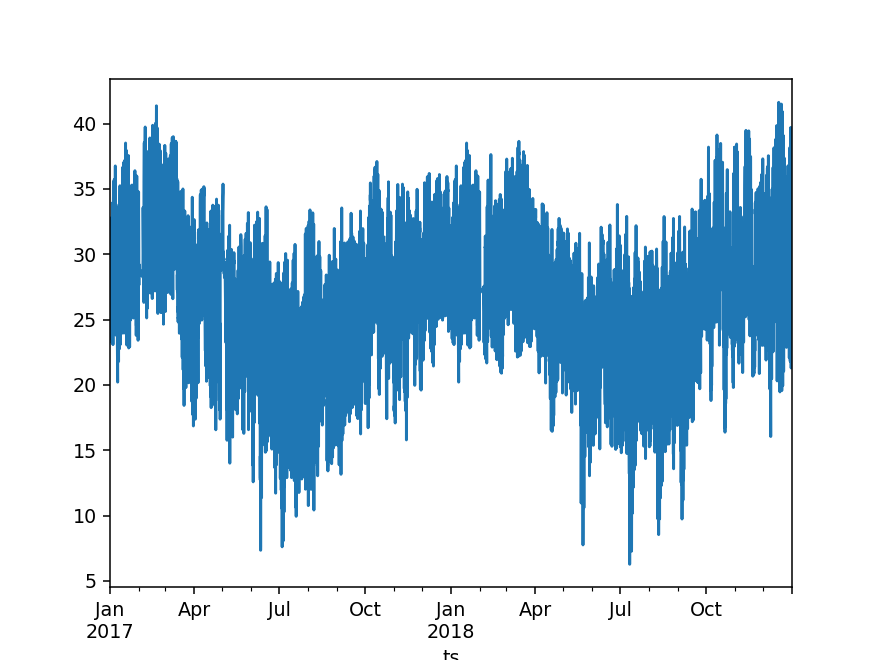

In [39]:
df_data['Humidex'].plot()

In [43]:
nivel = []
humidex_values = df_data['Humidex'].values
for h in humidex_values:
    if h<=29: 
        nivel.append('comfortable')
    elif h<=39: 
        nivel.append('some discomfort')
    elif h<=45: 
        nivel.append('great discomfort')
    else: 
        nivel.append('dangerous')
df_data['Nivel'] = nivel

In [49]:
(df_data['Nivel']=='great discomfort').sum()

47

In [50]:
df_data

,Temperatura,Umidade,Humidex,Nivel
ts,,,,
2017-01-01 00:00:00,19.509286,85.564286,24.720297,comfortable
2017-01-01 01:00:00,19.685000,84.550000,24.884933,comfortable
2017-01-01 02:00:00,19.283333,87.566667,24.592768,comfortable
2017-01-01 03:00:00,19.080714,89.007143,24.430554,comfortable
2017-01-01 04:00:00,19.039286,88.814286,24.337462,comfortable
...,...,...,...,...
2018-12-31 19:00:00,27.980000,62.733333,35.554579,some discomfort
2018-12-31 20:00:00,25.134286,71.327143,32.207899,some discomfort
2018-12-31 21:00:00,23.837143,75.842857,30.709383,some discomfort


In [98]:
df_H = df_data[['Humidex']].copy()
df_H['interval'] = df_H.index.time
df_H.index = df_H.index.date
df_pivot_H = df_H.pivot(columns='interval')
df_pivot_H = df_pivot_H.dropna()

In [99]:
df_pivot_H

Humidex                                                         \
interval     00:00:00   01:00:00   02:00:00   03:00:00   04:00:00   05:00:00   
2017-01-01  24.720297  24.884933  24.592768  24.430554  24.337462  24.290917   
2017-01-02  24.515005  24.567162  24.523267  24.072398  23.537497  23.697903   
2017-01-03  24.625508  25.810377  24.652209  24.082442  23.527147  23.206193   
2017-01-04  25.083171  27.136559  24.292624  23.295476  23.150642  23.078906   
2017-01-05  27.058265  29.412806  27.220187  25.993376  25.649774  25.661876   
...               ...        ...        ...        ...        ...        ...   
2018-12-27  26.218254  25.467183  27.816983  28.999039  28.243997  28.933953   
2018-12-28  25.798320  24.255782  24.793719  24.810622  24.057444  23.900700   
2018-12-29  25.863464  22.061071  23.675685  24.116289  24.232235  24.044207   
2018-12-30  27.489499  21.799640  25.122694  25.952676  25.457165  25.313396   
2018-12-31  27.837886  21.286623  23.794092  24.585528  24.020876  24.021743   

                                                        ...             \
interval     06:00:00   07:00:00   08:00:00   09:00:00  ...   14:00:00   
2017-01-01  24.473028  24.960593  26.359601  27.580916  ...  29.943793   
2017-01-02  25.141417  26.779263  29.186864  30.881256  ...  32.190832   
2017-01-03  24.010241  26.439743  28.465257  29.951692  ...  32.713780   
2017-01-04  24.858079  27.965316  29.798976  31.751619  ...  34.312412   
2017-01-05  26.049949  29.101168  31.151391  32.898857  ...  35.729002   
...               ...        ...        ...        ...  ...        ...   
2018-12-27  29.103618  29.533066  30.456939  30.274303  ...  35.674004   
2018-12-28  26.786712  30.207978  32.033064  33.491142  ...  35.315225   
2018-12-29  26.803722  30.235145  31.961981  33.905968  ...  37.101263   
2018-12-30  28.656070  31.741853  33.614874  35.271118  ...  38.527316   
2018-12-31  26.762913  31.036784  33.795386  35.592508  ...  35.992497   

                                                                              \
interval     15:00:00   16:00:00   17:00:00   18:00:00   19:00:00   20:00:00   
2017-01-01  30.469021  30.505261  29.655900  26.467625  24.995911  24.639636   
2017-01-02  31.973813  32.814528  30.974344  28.775255  26.958593  25.835757   
2017-01-03  32.533527  33.930974  33.449527  31.053808  28.427693  26.165173   
2017-01-04  34.395202  35.566063  34.469348  33.503785  31.268657  29.603481   
2017-01-05  34.926547  35.607100  35.459651  32.920551  30.791544  28.583688   
...               ...        ...        ...        ...        ...        ...   
2018-12-27  35.455336  36.769434  34.333727  28.885920  27.284024  27.620258   
2018-12-28  35.284143  35.843503  33.365163  31.785320  30.048884  27.955494   
2018-12-29  36.531953  38.165504  37.760632  36.316617  34.339284  31.269875   
2018-12-30  37.658290  39.707431  38.785850  37.181255  36.777732  34.104747   
2018-12-31  36.184532  36.839188  36.385445  36.555964  35.554579  32.207899   

                                             
interval     21:00:00   22:00:00   23:00:00  
2017-01-01  24.468891  24.467684  24.514259  
2017-01-02  25.388821  25.148007  24.736352  
2017-01-03  25.350965  24.948666  24.624170  
2017-01-04  28.340487  27.633380  26.954642  
2017-01-05  27.057595  26.009531  25.414172  
...               ...        ...        ...  
2018-12-27  27.491967  27.396072  27.301787  
2018-12-28  27.966673  27.298918  26.698942  
2018-12-29  30.249278  29.528676  28.716269  
2018-12-30  32.322296  31.057591  29.837837  
2018-12-31  30.709383  29.631326  28.598271  

[730 rows x 24 columns]

In [100]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
from tslearn.metrics import cdist_dtw
from sklearn.preprocessing import MinMaxScaler

In [101]:
X_train = df_pivot_H.values.copy()
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)


In [102]:
interval = 25
number_cluster = 3
km = TimeSeriesKMeans(n_clusters=number_cluster,
                           metric="softdtw",
                           metric_params={"gamma": 1},
                           verbose=True,
                           init='random',
                           max_iter=200)
y_pred = km.fit_predict(X_train)
coff2 = silhouette_score(X_train, y_pred, metric="softdtw",metric_params={"gamma": 1})
print('Silhoutte: ',coff2)
cluster_found_sr = pd.Series(y_pred, name='cluster')
DFINAL = df_pivot_H['Humidex'].copy()
DFINAL['cluster'] = y_pred
df_pivot_H = df_pivot_H.set_index(cluster_found_sr, append=True )
cluster_values = sorted(df_pivot_H.index.get_level_values('cluster').unique())

#X_train = sc.inverse_transform(X_train)
centroids = sc.inverse_transform(km.cluster_centers_[:,:,0])

1388.549 --> 1436.126 --> 1439.422 --> 1439.725 --> 1439.849 --> 1439.884 --> 1439.898 --> 1439.905 --> 1439.908 --> 1439.914 --> 1439.930 --> 1439.939 --> 1439.939 --> 1439.939 --> 1439.940 --> 1439.942 --> 1439.943 --> 1439.943 --> 1439.943 --> 
Silhoutte:  0.5758277395010449


<IPython.core.display.Javascript object>


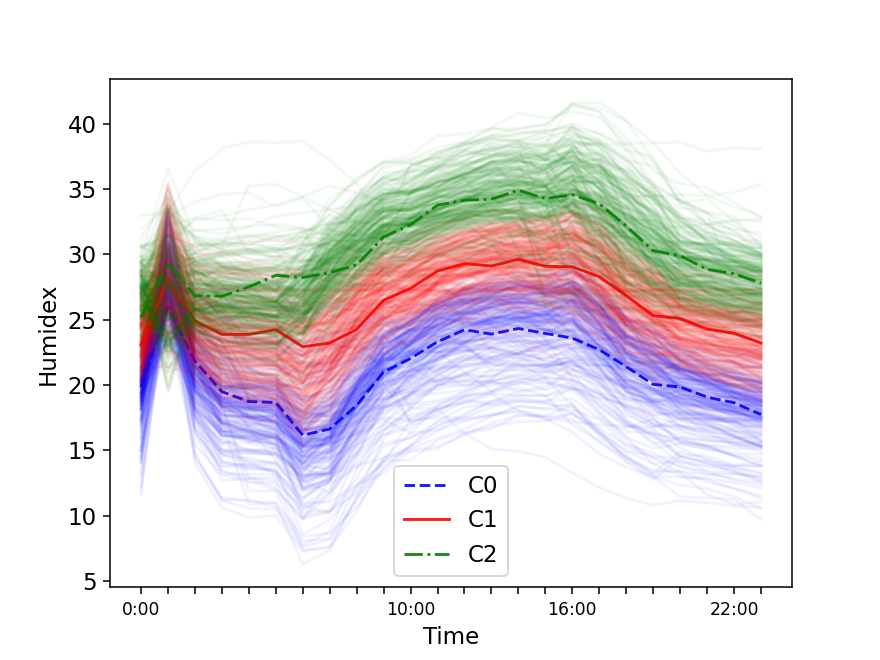

0  Dias:  (209, 24)
1  Dias:  (263, 24)
2  Dias:  (258, 24)


In [93]:
color_list = ['blue','red','green','orange','yellow','black','purple','skyblue','cyan','brown']
plt.figure('ACTIVE') 
LS = ['--','-','-.','-','--',':'] #
for cluster, color in zip(cluster_values, color_list):
    curvas = df_pivot_H.xs(cluster, level=1)['Humidex']
    plt.plot(np.arange(1,interval),curvas.T, alpha=0.05, color=color)
    plt.plot(np.arange(1,interval),centroids[cluster][:interval-1].ravel(),color=color,
             label= f'C{cluster}',alpha=0.9, ls=LS[cluster])
    print(cluster,' Dias: ',curvas.shape)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xticks(np.arange(1,interval),['0:00','','','','','','','','','','10:00','',
                                   '','','','','16:00','','','','','','22:00','',''],fontsize=9)
plt.yticks(fontsize=12)
plt.ylabel('Humidex',fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.legend(loc = 'best',fontsize=12)
plt.show()

In [85]:
df_pivot_H

Humidex                                              \
interval             00:00:00   01:00:00   02:00:00   03:00:00   04:00:00   
           cluster                                                          
2017-01-01 2        24.720297  24.884933  24.592768  24.430554  24.337462   
2017-01-02 2        24.515005  24.567162  24.523267  24.072398  23.537497   
2017-01-03 2        24.625508  25.810377  24.652209  24.082442  23.527147   
2017-01-04 0        25.083171  27.136559  24.292624  23.295476  23.150642   
2017-01-05 0        27.058265  29.412806  27.220187  25.993376  25.649774   
...                       ...        ...        ...        ...        ...   
2018-12-27 0        26.218254  25.467183  27.816983  28.999039  28.243997   
2018-12-28 0        25.798320  24.255782  24.793719  24.810622  24.057444   
2018-12-29 0        25.863464  22.061071  23.675685  24.116289  24.232235   
2018-12-30 0        27.489499  21.799640  25.122694  25.952676  25.457165   
2018-12-31 0        27.837886  21.286623  23.794092  24.585528  24.020876   

                                                                           \
interval             05:00:00   06:00:00   07:00:00   08:00:00   09:00:00   
           cluster                                                          
2017-01-01 2        24.290917  24.473028  24.960593  26.359601  27.580916   
2017-01-02 2        23.697903  25.141417  26.779263  29.186864  30.881256   
2017-01-03 2        23.206193  24.010241  26.439743  28.465257  29.951692   
2017-01-04 0        23.078906  24.858079  27.965316  29.798976  31.751619   
2017-01-05 0        25.661876  26.049949  29.101168  31.151391  32.898857   
...                       ...        ...        ...        ...        ...   
2018-12-27 0        28.933953  29.103618  29.533066  30.456939  30.274303   
2018-12-28 0        23.900700  26.786712  30.207978  32.033064  33.491142   
2018-12-29 0        24.044207  26.803722  30.235145  31.961981  33.905968   
2018-12-30 0        25.313396  28.656070  31.741853  33.614874  35.271118   
2018-12-31 0        24.021743  26.762913  31.036784  33.795386  35.592508   

                    ...                                              \
interval            ...   14:00:00   15:00:00   16:00:00   17:00:00   
           cluster  ...                                               
2017-01-01 2        ...  29.943793  30.469021  30.505261  29.655900   
2017-01-02 2        ...  32.190832  31.973813  32.814528  30.974344   
2017-01-03 2        ...  32.713780  32.533527  33.930974  33.449527   
2017-01-04 0        ...  34.312412  34.395202  35.566063  34.469348   
2017-01-05 0        ...  35.729002  34.926547  35.607100  35.459651   
...                 ...        ...        ...        ...        ...   
2018-12-27 0        ...  35.674004  35.455336  36.769434  34.333727   
2018-12-28 0        ...  35.315225  35.284143  35.843503  33.365163   
2018-12-29 0        ...  37.101263  36.531953  38.165504  37.760632   
2018-12-30 0        ...  38.527316  37.658290  39.707431  38.785850   
2018-12-31 0        ...  35.992497  36.184532  36.839188  36.385445   

                                                                           \
interval             18:00:00   19:00:00   20:00:00   21:00:00   22:00:00   
           cluster                                                          
2017-01-01 2        26.467625  24.995911  24.639636  24.468891  24.467684   
2017-01-02 2        28.775255  26.958593  25.835757  25.388821  25.148007   
2017-01-03 2        31.053808  28.427693  26.165173  25.350965  24.948666   
2017-01-04 0        33.503785  31.268657  29.603481  28.340487  27.633380   
2017-01-05 0        32.920551  30.791544  28.583688  27.057595  26.009531   
...                       ...        ...        ...        ...        ...   
2018-12-27 0        28.885920  27.284024  27.620258  27.491967  27.396072   
2018-12-28 0        31.785320  30.048884  27.955494  27.966673  27.298918   
2018-12-29 0        36

In [86]:
df_pivot_H['Humidex']

,interval,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
,cluster,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2,24.720297,24.884933,24.592768,24.430554,24.337462,24.290917,24.473028,24.960593,26.359601,27.580916,...,29.943793,30.469021,30.505261,29.655900,26.467625,24.995911,24.639636,24.468891,24.467684,24.514259
2017-01-02,2,24.515005,24.567162,24.523267,24.072398,23.537497,23.697903,25.141417,26.779263,29.186864,30.881256,...,32.190832,31.973813,32.814528,30.974344,28.775255,26.958593,25.835757,25.388821,25.148007,24.736352
2017-01-03,2,24.625508,25.810377,24.652209,24.082442,23.527147,23.206193,24.010241,26.439743,28.465257,29.951692,...,32.713780,32.533527,33.930974,33.449527,31.053808,28.427693,26.165173,25.350965,24.948666,24.624170
2017-01-04,0,25.083171,27.136559,24.292624,23.295476,23.150642,23.078906,24.858079,27.965316,29.798976,31.751619,...,34.312412,34.395202,35.566063,34.469348,33.503785,31.268657,29.603481,28.340487,27.633380,26.954642
2017-01-05,0,27.058265,29.412806,27.220187,25.993376,25.649774,25.661876,26.049949,29.101168,31.151391,32.898857,...,35.729002,34.926547,35.607100,35.459651,32.920551,30.791544,28.583688,27.057595,26.009531,25.414172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0,26.218254,25.467183,27.816983,28.999039,28.243997,28.933953,29.103618,29.533066,30.456939,30.274303,...,35.674004,35.455336,36.769434,34.333727,28.885920,27.284024,27.620258,27.491967,27.396072,27.301787
2018-12-28,0,25.798320,24.255782,24.793719,24.810622,24.057444,23.900700,26.786712,30.207978,32.033064,33.491142,...,35.315225,35.284143,35.843503,33.365163,31.785320,30.048884,27.955494,27.966673,27.298918,26.698942
2018-12-29,0,25.863464,22.061071,23.675685,24.116289,24.232235,24.044207,26.803722,30.235145,31.961981,33.905968,...,37.101263,36.531953,38.165504,37.760632,36.316617,34.339284,31.269875,30.249278,29.528676,28.716269


In [104]:
DFINAL.to_csv('tscluster.csv')

In [105]:
DFINAL

interval,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,cluster
2017-01-01,24.720297,24.884933,24.592768,24.430554,24.337462,24.290917,24.473028,24.960593,26.359601,27.580916,...,30.469021,30.505261,29.655900,26.467625,24.995911,24.639636,24.468891,24.467684,24.514259,0
2017-01-02,24.515005,24.567162,24.523267,24.072398,23.537497,23.697903,25.141417,26.779263,29.186864,30.881256,...,31.973813,32.814528,30.974344,28.775255,26.958593,25.835757,25.388821,25.148007,24.736352,0
2017-01-03,24.625508,25.810377,24.652209,24.082442,23.527147,23.206193,24.010241,26.439743,28.465257,29.951692,...,32.533527,33.930974,33.449527,31.053808,28.427693,26.165173,25.350965,24.948666,24.624170,0
2017-01-04,25.083171,27.136559,24.292624,23.295476,23.150642,23.078906,24.858079,27.965316,29.798976,31.751619,...,34.395202,35.566063,34.469348,33.503785,31.268657,29.603481,28.340487,27.633380,26.954642,2
2017-01-05,27.058265,29.412806,27.220187,25.993376,25.649774,25.661876,26.049949,29.101168,31.151391,32.898857,...,34.926547,35.607100,35.459651,32.920551,30.791544,28.583688,27.057595,26.009531,25.414172,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,26.218254,25.467183,27.816983,28.999039,28.243997,28.933953,29.103618,29.533066,30.456939,30.274303,...,35.455336,36.769434,34.333727,28.885920,27.284024,27.620258,27.491967,27.396072,27.301787,2
2018-12-28,25.798320,24.255782,24.793719,24.810622,24.057444,23.900700,26.786712,30.207978,32.033064,33.491142,...,35.284143,35.843503,33.365163,31.785320,30.048884,27.955494,27.966673,27.298918,26.698942,2
2018-12-29,25.863464,22.061071,23.675685,24.116289,24.232235,24.044207,26.803722,30.235145,31.961981,33.905968,...,36.531953,38.165504,37.760632,36.316617,34.339284,31.269875,30.249278,29.528676,28.716269,2
2018-12-30,27.489499,21.799640,25.122694,25.952676,25.457165,25.313396,28.656070,31.741853,33.614874,35.271118,...,37.658290,39.707431,38.785850,37.181255,36.777732,34.104747,32.322296,31.057591,29.837837,2
